In [1]:
# Decision tree uses GINI impurity
# A function that determines how well a decision tree was split. It ranges from 0 to 0.5

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = [30,15]

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy: 0.98


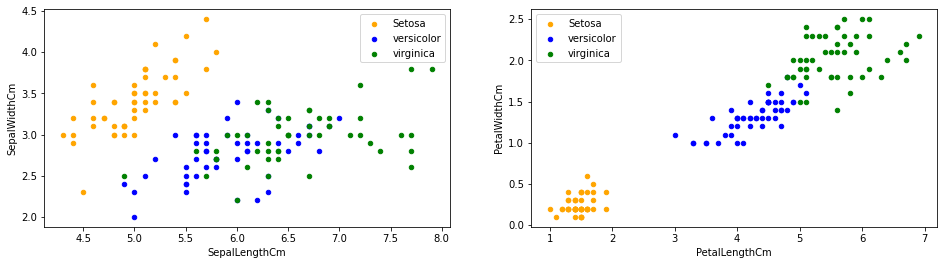

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show()

In [8]:
# Example of the output using input
clf_gini.predict([[1,1, 5, 1.5]])

array(['Iris-virginica'], dtype=object)

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



[Text(627.75, 713.475, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(418.5, 509.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(837.0, 509.625, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(418.5, 305.775, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(209.25, 101.92499999999995, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(627.75, 101.92499999999995, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(1255.5, 305.775, 'X[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(1046.25, 101.92499999999995, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(1464.75, 101.92499999999995, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

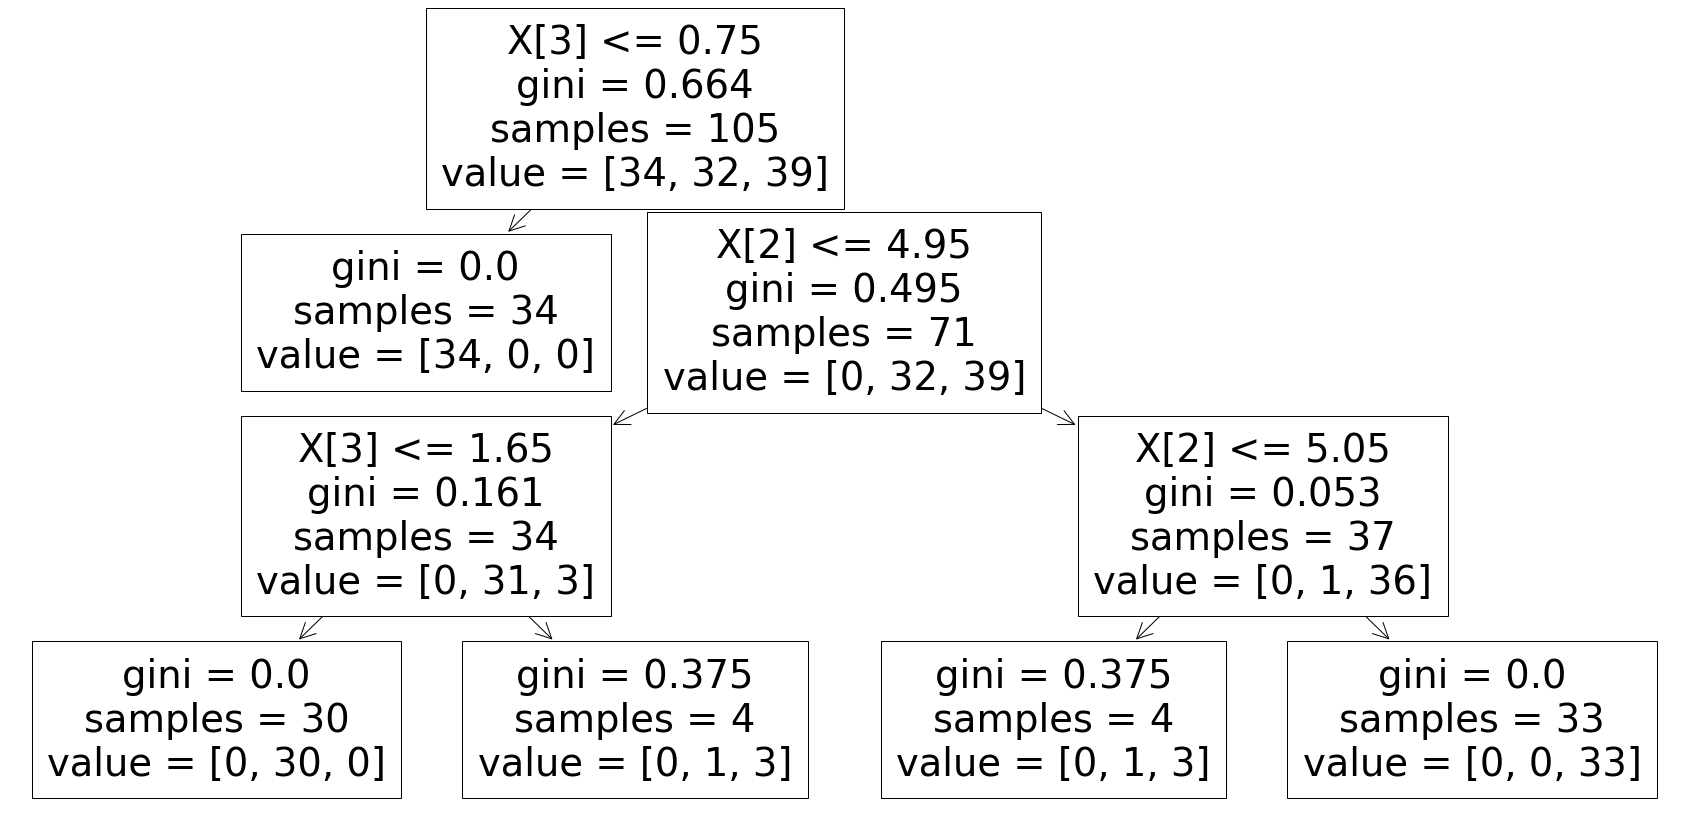

In [10]:
tree.plot_tree(clf_gini)